In [1]:
import pandas as pd

peakinf = []

In [2]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

In [3]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

dfDate = pd.DataFrame(df1)
dfDate

,0
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
...,...
62,3/24/20
63,3/25/20
64,3/26/20
65,3/27/20


In [4]:
China = df[df["Country/Region"] == "China"]  
China
dChina = China.groupby("Last Update")
dChina = dChina.sum()
dChina
dChina = list(dChina["Confirmed"].values)
dChina.sort()
dChina

ChinaCases = pd.DataFrame({"China": dChina})

ChinaCases
ChinaCases = pd.concat([dfDate,ChinaCases], axis=1, sort = False)
ChinaCases
ChinaCases = ChinaCases.rename(columns={0: "Date"})
ChinaCases

,Date,China
0,1/22/20,547
1,1/23/20,639
2,1/24/20,916
3,1/25/20,1399
4,1/26/20,2062
...,...,...
62,3/24/20,79574
63,3/25/20,79588
64,3/26/20,79749
65,3/27/20,79771


In [5]:
FMT = '%m/%d/%y'
days = ChinaCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday
#ChinaCases['Date'] = days.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT)).days  )

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67]

In [6]:
import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

In [7]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
Day = numday
Cases = list(ChinaCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("China Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.367235676437937
18.339713440933664
77707.934009508
Day of Inflection: 2020-02-09 00:00:00
End of the Infection: 2020-03-28 00:00:00


In [8]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

Day of Inflection: 2020-02-09 00:00:00


In [9]:
sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

End of the Infection: 2020-03-28 00:00:00


In [10]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))


SK = df[df["Country/Region"] == "South Korea"]  
SK
dSK = list(SK["Confirmed"].values)
dSK.sort()
length = len(dSK)

dfDate = pd.DataFrame(df1[0:length])
dfDate

SKCases = pd.DataFrame({"South Korea": dSK})

SKCases
SKCases = pd.concat([dfDate,SKCases], axis=1, sort = False)
SKCases
SKCases = SKCases.rename(columns={0: "Date"})
SKCases

FMT = '%m/%d/%y'
days = SKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

3.4701968393671003
36.422175095701
8879.324147064912
Day of Inflection: 2020-03-05 00:00:00
End of the Infection: 2020-04-01 00:00:00


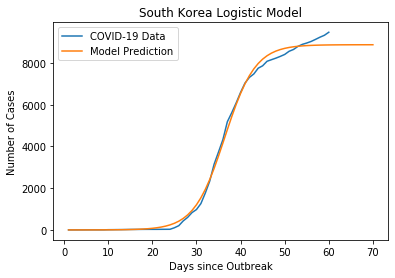

In [11]:
Day = numday
Cases = list(SKCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")

plt.title("South Korea Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [12]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

Day of Inflection: 2020-02-27 00:00:00
End of the Infection: 2020-04-01 00:00:00


In [13]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

USA = df[df["Country/Region"] == "US"]  
USA
dUS = USA.groupby("Last Update")
dUS = dUS.sum()
dUS

dUS = list(dUS["Confirmed"].values)
dUS.sort()
dUS

length = len(dUS)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

USCases = pd.DataFrame({"US": dUS})
USCases
USCases = pd.concat([dfDate,USCases], axis=1, sort = False)
USCases
USCases = USCases.rename(columns={0: "Date"})
USCases

FMT = '%m/%d/%y'
days = USCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

3.170850301555759
50.893133722405295
237325.15653904516
Day of Inflection: 2020-03-28 00:00:00
End of the Infection: 2020-04-26 00:00:00


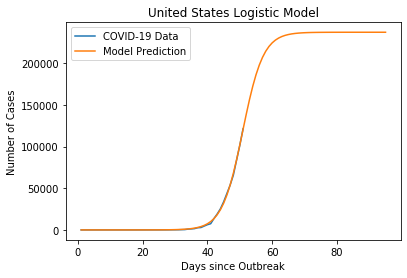

In [14]:
Day = numday
Cases = list(USCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United States Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [15]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

ITA = df[df["Country/Region"] == "Italy"]  
dItaly = ITA.groupby("Last Update")
dItaly = dItaly.sum()
dItaly

dItaly = list(dItaly["Confirmed"].values)
dItaly.sort()
dItaly

length = len(dItaly)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

ITACases = pd.DataFrame({"Italy": dItaly})
ITACases
ITACases = pd.concat([dfDate,ITACases], axis=1, sort = False)
ITACases
ITACases = ITACases.rename(columns={0: "Date"})
ITACases

FMT = '%m/%d/%y'
days = ITACases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

4.0911709469402044
28.97263075890921
105430.77812393679
Day of Inflection: 2020-03-21 00:00:00
End of the Infection: 2020-04-07 00:00:00


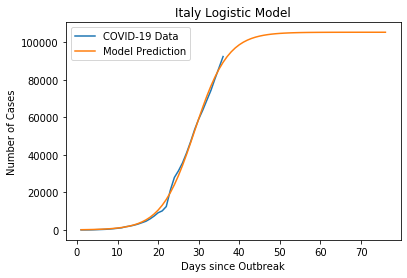

In [16]:
Day = numday
Cases = list(ITACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Italy Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.381458357617961
40.24372556306867
62575.79999852355
Day of Inflection: 2020-04-02 00:00:00
End of the Infection: 2020-05-20 00:00:00


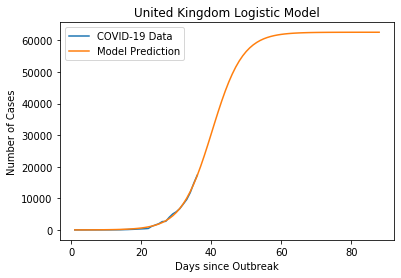

In [17]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

UK = df[df["Country/Region"] == "United Kingdom"]  
dUK = UK.groupby("Last Update")
dUK = dUK.sum()
dUK

dUK = list(dUK["Confirmed"].values)
dUK.sort()
dUK

length = len(dUK)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

UKCases = pd.DataFrame({"United Kingdom": dUK})
UKCases
UKCases = pd.concat([dfDate,UKCases], axis=1, sort = False)
UKCases
UKCases = UKCases.rename(columns={0: "Date"})
UKCases

FMT = '%m/%d/%y'
days = UKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(UKCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United Kingdom Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

2.701371731208712
18.68120432424304
1037.8199149074474
Day of Inflection: 2020-03-29 00:00:00
End of the Infection: 2020-04-16 00:00:00


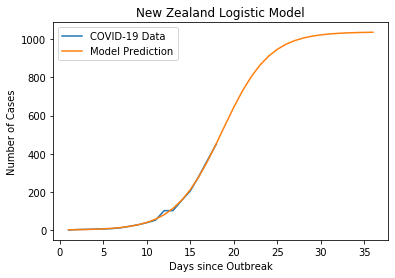

In [18]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

NZ = df[df["Country/Region"] == "New Zealand"]  
dNZ = NZ.groupby("Last Update")
dNZ = dNZ.sum()
dNZ

dNZ = list(dNZ["Confirmed"].values)
dNZ.sort()
dNZ

length = len(dNZ)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

NZCases = pd.DataFrame({"New Zealand": dNZ})
NZCases
NZCases = pd.concat([dfDate,NZCases], axis=1, sort = False)
NZCases
NZCases = NZCases.rename(columns={0: "Date"})
NZCases

FMT = '%m/%d/%y'
days = NZCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(NZCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("New Zealand Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.164848465896461
29.730145659273266
42447.32141224196
Day of Inflection: 2020-03-21 00:00:00
End of the Infection: 2020-06-01 00:00:00


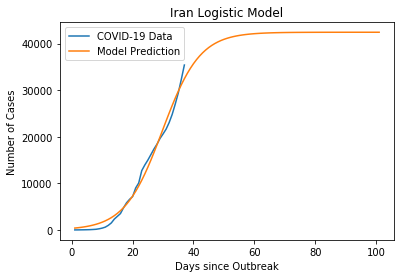

In [19]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IR = df[df["Country/Region"] == "Iran"]  
dIR = IR.groupby("Last Update")
dIR = dIR.sum()
dIR

dIR = list(dIR["Confirmed"].values)
dIR.sort()
dIR

length = len(dIR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

IRCases = pd.DataFrame({"Iran": dIR})
IRCases
IRCases = pd.concat([dfDate,IRCases], axis=1, sort = False)
IRCases
IRCases = IRCases.rename(columns={0: "Date"})
IRCases

FMT = '%m/%d/%y'
days = IRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(IRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Iran Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [20]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

,Date,Australia
0,1/22/20,0
1,1/23/20,2
2,1/24/20,3
3,1/25/20,4
4,1/26/20,4
5,1/27/20,4
6,1/28/20,5
7,1/29/20,5
8,1/30/20,5
9,1/31/20,5


3.5678210796438092
44.29959105949179
5842.179113546007
Day of Inflection: 2020-03-27 00:00:00
End of the Infection: 2020-05-02 00:00:00


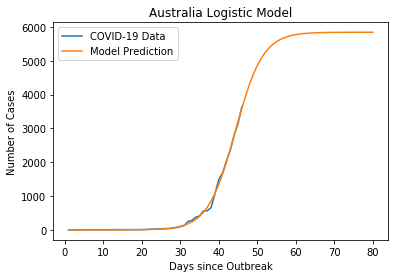

In [21]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

FMT = '%m/%d/%y'
days = AUCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(AUCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Australia Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.788094775308883
33.48324806845805
2666.947628169576
Day of Inflection: 2020-03-31 00:00:00
End of the Infection: 2020-05-07 00:00:00


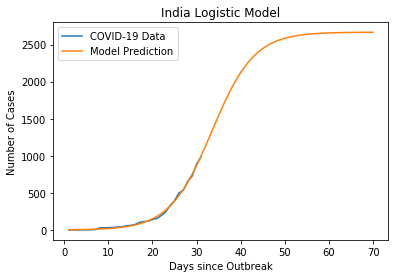

In [22]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IN = df[df["Country/Region"] == "India"]  
dIN = IN.groupby("Last Update")
dIN = dIN.sum()
dIN

dIN = list(dIN["Confirmed"].values)
dIN.sort()
dIN
length = len(dIN)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

INCases = pd.DataFrame({"India": dIN})
INCases
INCases = pd.concat([dfDate,INCases], axis=1, sort = False)
INCases
INCases = INCases.rename(columns={0: "Date"})
INCases

FMT = '%m/%d/%y'
days = INCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(INCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("India Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

3.3817418463793945
15.070072439587031
811.7011665021364
Day of Inflection: 2020-03-24 00:00:00
End of the Infection: 2020-04-15 00:00:00


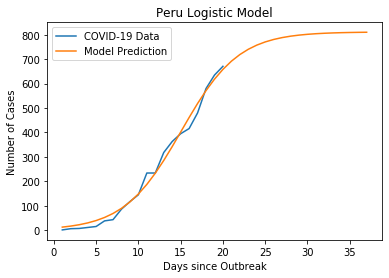

In [23]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

PR = df[df["Country/Region"] == "Peru"]  
dPR = PR.groupby("Last Update")
dPR = dPR.sum()
dPR

dPR = list(dPR["Confirmed"].values)
dPR.sort()
dPR
length = len(dPR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

PRCases = pd.DataFrame({"Peru": dPR})
PRCases
PRCases = pd.concat([dfDate,PRCases], axis=1, sort = False)
PRCases
PRCases = PRCases.rename(columns={0: "Date"})
PRCases

FMT = '%m/%d/%y'
days = PRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(PRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Peru Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [24]:
peakinf

[77708, 8880, 237326, 105431, 62576, 1038, 42448, 5843, 2667, 812]

In [25]:
data = pd.DataFrame({"Peak Infections": peakinf})
country = ["China", "South Korea", "United States", "Italy", "United Kingdom", "New Zealand", "Iran", "Australia", "India", "Peru"]
cont = pd.DataFrame({"Country": country})
data = pd.concat([cont,data], axis=1, sort = False)

data = data.sort_values(by=['Country'])
data

,Country,Peak Infections
7,Australia,5843
0,China,77708
8,India,2667
6,Iran,42448
3,Italy,105431
5,New Zealand,1038
9,Peru,812
1,South Korea,8880
4,United Kingdom,62576
2,United States,237326


In [26]:
df3 = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEAN_WorldHealthIndex.csv')
df3

countries = ['UnitedStatesofAmerica', 'China', 'Italy', 'NewZealand', 'RepublicofKorea', 'UnitedKingdom', 'Iran,IslamicRepublicof', 'Australia', 'India', 'Peru']
df3 = df3.loc[df3['Member State'].isin(countries)]

df3 = df3.sort_values(by=['Member State'])

indexes = list(df3['Index'].values)
index = pd.DataFrame({"WHO Index": indexes})

data = pd.concat([data,index], axis=1, sort = False)
data

,Country,Peak Infections,WHO Index
0,China,77708,0.876
1,South Korea,8880,0.485
2,United States,237326,0.617
3,Italy,105431,0.659
4,United Kingdom,62576,0.991
5,New Zealand,1038,0.827
6,Iran,42448,0.547
7,Australia,5843,0.759
8,India,2667,0.925
9,Peru,812,0.838


In [27]:
import numpy as np
def GompertzModel(x,a,b,c):
    return a*(np.exp(b*(np.exp(c*x))))

from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

Day = numday
Cases = list(ChinaCases.iloc[:,1])
fit2 = curve_fit(GompertzModel,Day,Cases, p0=[77000, -20, 2],)

params = fit2[0]

a = params[0]
b = params[1]
c = params[2]

print(a)
print(b)
print(c)
#Pred = LogisticModel(Day, *params)
#plt.plot(Day, Pred)
#plt.plot(Day, Cases)

ValueError: operands could not be broadcast together with shapes (20,) (67,) 